# Building a Spotify Recommendation Engine for Music Labels
## Data Collection, Cleaning, and EDA
### Flatiron School Data Science Program Phase 4 Project<br>Justin Williams & Khyatee Desai

In [92]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from zipfile import ZipFile 
from sklearn import set_config
set_config(print_changed_only=False, display=None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Data Collection with Webscraping

## Sub Pop Records Artists

In [51]:
# retrieve html page and create beautifulsoup object

page = requests.get('https://www.subpop.com/artists/list')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
subpop = []
artists = soup.find(id="all-artists")
for name in artists.findAll('a')[:-1]:
    subpop.append(name.text)

In [52]:
# add subpop artists to Labels dataframe

label_list = ['Sub Pop']*len(subpop)
to_df = zip(subpop, label_list)
subpop_df = pd.DataFrame(to_df)
subpop_df.head()

,0,1
0,10 Minute Warning,Sub Pop
1,5ive Style,Sub Pop
2,68 Comeback,Sub Pop
3,764-HERO,Sub Pop
4,A Frames,Sub Pop


## 4AD Artists

In [53]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://4ad.com/artists')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
AD4 = []
artists = soup.find(id="artistlistingmain")
for name in artists.findAll('a',href=True):
    AD4.append(name.text)

In [54]:
# add 4AD artists to Labels dataframe

label_list = ['4AD']*len(AD4)
to_df = zip(AD4, label_list)
fourad_df = pd.DataFrame(to_df)
fourad_df.head()

,0,1
0,50 Foot Wave,4AD
1,A.R. Kane,4AD
2,Adrianne Lenker,4AD
3,Air Miami,4AD
4,Aldous Harding,4AD


## Fat Possum Records

In [55]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://fatpossum.com/featured-artists/all-artists/')
soup = BeautifulSoup(page.text)
soup.prettify

# # parse through soup and save artist names in a list
possum = []
artists = soup.find(id="all-artists")
for name in artists.findAll('a',href=True, title=True):
    possum.append(name.text)

In [56]:
# add fat possum artists to dataframe

label_list = ['Fat Possum']*len(possum)
to_df = zip(possum, label_list)
possum_df = pd.DataFrame(to_df)
possum_df.head()

,0,1
0,2:54,Fat Possum
1,A. A. Bondy,Fat Possum
2,Adam Green,Fat Possum
3,Adam Torres,Fat Possum
4,Al Green,Fat Possum


## Matador Records

In [57]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://www.matadorrecords.com/artists')
soup = BeautifulSoup(page.text)
soup.prettify

matador = []
artists = soup.find(class_="artists-page")
for name in artists.findAll('a',href=True):
    if name.text:
        matador.append(name.text) 

# get alumni artists
alumns = soup.find(class_="col-section")
for name in alumns.findAll('a',href=True)[1:]:
    matador.append(name.text)

In [58]:
# add Matador artists to dataframe

label_list = ['Matador']*len(matador)
to_df = zip(matador, label_list)
matador_df = pd.DataFrame(to_df)
matador_df.head()

,0,1
0,Algiers,Matador
1,Belle and Sebastian,Matador
2,Body/Head,Matador
3,Car Seat Headrest,Matador
4,Courtney Barnett & Kurt Vile,Matador


## Third Man Records

In [59]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://thirdmanstore.com/bands')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
thirdman = []
artists = soup.find(class_="category-view")
for name in artists.findAll('a',href=True):
    thirdman.append(name.text)

In [60]:
# add third man artists to dataframe

label_list = ['Third Man']*len(thirdman)
to_df = zip(thirdman, label_list)
thirdman_df = pd.DataFrame(to_df)
thirdman_df.head()

,0,1
0,The 5.6.7.8’s,Third Man
1,Aaron Lee Tasjan,Third Man
2,ADULT.,Third Man
3,AJJ,Third Man
4,Alabama Shakes,Third Man


## XL Records

In [61]:
# retrieve html page and create beautifulsoup object
page = requests.get('https://xlrecordings.com/buy')
soup = BeautifulSoup(page.text)
soup.prettify


# parse through soup and save artist names in a list
XL = []
artists = soup.find(class_="artists")
for name in artists.findAll('a',href=True):
    XL.append(name.text)

In [62]:
# add XL records artists to dataframe

label_list = ['XL']*len(XL)
to_df = zip(XL, label_list)
XL_df = pd.DataFrame(to_df)
XL_df.head()

,0,1
0,Adele,XL
1,Arca,XL
2,Archy Marshall,XL
3,Atoms For Peace,XL
4,Baba Stiltz,XL


## Dead Oceans

In [63]:
# retrieve html page and create beautifulsoup object (dead oceans website blocks requests, so using Wikipedia)
page = requests.get('https://en.wikipedia.org/wiki/Dead_Oceans#Artists')
soup = BeautifulSoup(page.text)
soup.prettify

# parse through soup and save artist names in a list
deadoceans = []
artists = soup.find(class_="div-col columns column-width")
for name in artists.findAll('a',href=True):
    deadoceans.append(name.text)

In [64]:
# add dead oceans artists to dataframe

label_list = ['Dead Oceans']*len(deadoceans)
to_df = zip(deadoceans, label_list)
deadoceans_df = pd.DataFrame(to_df)
deadoceans_df.head()

,0,1
0,A Place to Bury Strangers,Dead Oceans
1,Akron/Family,Dead Oceans
2,Julianna Barwick,Dead Oceans
3,Bear in Heaven,Dead Oceans
4,Better Oblivion Community Center,Dead Oceans


## Touch and Go

In [65]:
# retrieve html page and create beautiful soup object
html_page = requests.get('http://www.tgrec.com/bands/index.php')
soup = BeautifulSoup(html_page.text)

In [66]:
# parse through soup and save artist names in a list
touch_and_go = []
artists = soup.find(id="bandsContent")
for name in artists.find_all('li')[:-3]:
    touch_and_go.append(name.text)

In [67]:
# add Touch and Go artists to dataframe

label_list = ['Touch and Go']*len(touch_and_go)
to_df = zip(touch_and_go, label_list)
touchngo_df = pd.DataFrame(to_df)
touchngo_df.head()

,0,1
0,!!!,Touch and Go
1,All the Saints,Touch and Go
2,Angry Red Planet,Touch and Go
3,Arcwelder,Touch and Go
4,Arsenal,Touch and Go


## Temporary Residence

In [68]:
# retrive html page and create beautiful soup object
html_page = requests.get("https://www.temporaryresidence.com/collections")
soup = BeautifulSoup(html_page.text)

In [69]:
# get current artists
temporary_residence = []
artists = soup.find(class_="grid-uniform")
for name in artists.findAll('p'):
    temporary_residence.append(name.text)

# get alumni artists 
alumns = soup.find_all('div', {"class":"grid-uniform"})[1]
for name in alumns.findAll('p'):
    temporary_residence.append(name.text)

In [70]:
# add Temporary Residence artists to dataframe

label_list = ['Temporary Residence']*len(temporary_residence)
to_df = zip(temporary_residence, label_list)
temp_residence_df = pd.DataFrame(to_df)
temp_residence_df.head()

,0,1
0,William Basinski,Temporary Residence
1,William Basinski + Lawrence English,Temporary Residence
2,Bruno Bavota,Temporary Residence
3,Beak>,Temporary Residence
4,Behind the Shadow Drops,Temporary Residence


### Concatenate all music label dataframes together

In [71]:
music_labels = pd.concat([subpop_df,fourad_df, possum_df, matador_df, XL_df, thirdman_df, deadoceans_df, touchngo_df, temp_residence_df], axis=0)
music_labels.rename(columns={0:'artist', 1:'label'}, inplace=True)
music_labels.sample(10)

,artist,label
28,Mt. St. Helens Vietnam Band,Dead Oceans
128,Scott Dunbar,Fat Possum
489,Uranium Club,Sub Pop
83,Supersystem,Touch and Go
487,Unrest,Sub Pop
132,The Evil Tambourines,Sub Pop
154,The Fuckers,Sub Pop
135,The Kills,Third Man
3,AJJ,Third Man
395,Sandy Duncan’s Eye,Sub Pop


### Merge Labels dataframe with Spotify dataframe

In [72]:
# extract Spotify dataset from zipped folder
with ZipFile("data/datasets.zip") as z:
    df = pd.read_csv(z.open(z.infolist()[0].filename))

In [73]:
# unpack lists in the Artists column, retain the first artist of the list
df['artists'] = df['artists'].str.slice(1,-1).str.split(',')
df['artists'] = df['artists'].map(lambda x: x[0])
df['artists'] = df['artists'].str.slice(1,-1)

In [74]:
# merge dataframes
df = df.merge(music_labels, left_on='artists', right_on='artist').drop('artists', axis=1)
df.sample(5)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,label
3820,0.0598,0.166,170960,0.969,0,3I1lz3x6QlzRgIsdJvDjWN,0.019700,0,0.9470,-5.324,1,Kracked,35,1987-12-14,0.0965,164.234,0.312,1987,Dinosaur Jr.,Third Man
3214,0.6100,0.503,323933,0.458,0,2bkwHzn1H2CxyLmmymaKHo,0.000004,9,0.1110,-9.094,0,My House,31,1982-02-23,0.0349,127.629,0.243,1982,Lou Reed,Matador
3740,0.0122,0.572,109533,0.843,0,0VAD8GUGL68sQcOdiHIjTU,0.742000,11,0.0992,-12.046,0,There Goes My Gun,44,1989-04-17,0.0458,126.320,0.717,1989,Pixies,4AD
3371,0.0131,0.560,297067,0.875,0,5O7RVmqK3AYoFfyeafxOqH,0.000693,10,0.0630,-4.483,1,This Is the Day,56,2001-11-22,0.0518,141.661,0.538,2001,The The,4AD
275,0.9590,0.702,141296,0.341,0,2W58jAfVl0yGaW8wjQunSR,0.000129,5,0.0392,-10.458,1,The Blood Done Sign My Name (Ain't You Glad),0,1947,0.2170,104.453,0.753,1947,Lead Belly,Third Man


# Data Cleaning

In [75]:
# look at dtypes and null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6783 entries, 0 to 6782
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      6783 non-null   float64
 1   danceability      6783 non-null   float64
 2   duration_ms       6783 non-null   int64  
 3   energy            6783 non-null   float64
 4   explicit          6783 non-null   int64  
 5   id                6783 non-null   object 
 6   instrumentalness  6783 non-null   float64
 7   key               6783 non-null   int64  
 8   liveness          6783 non-null   float64
 9   loudness          6783 non-null   float64
 10  mode              6783 non-null   int64  
 11  name              6783 non-null   object 
 12  popularity        6783 non-null   int64  
 13  release_date      6783 non-null   object 
 14  speechiness       6783 non-null   float64
 15  tempo             6783 non-null   float64
 16  valence           6783 non-null   float64


In [76]:
# get some descriptive statistics
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,6783.000000,6783.000000,6.783000e+03,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000,6783.000000
mean,0.451892,0.518841,2.133612e+05,0.546439,0.022556,0.136568,5.224090,0.209488,-10.422561,0.761905,35.982014,0.069722,120.497335,0.549693,1981.954887
std,0.357979,0.161543,9.966646e+04,0.250292,0.148495,0.266531,3.554757,0.184069,4.493907,0.425949,15.986253,0.096218,30.995108,0.259269,20.429306
min,0.000001,0.062600,2.186400e+04,0.000576,0.000000,0.000000,0.000000,0.026100,-36.982000,0.000000,0.000000,0.022800,31.988000,0.029700,1927.000000
25%,0.059300,0.410000,1.557530e+05,0.347000,0.000000,0.000013,2.000000,0.101000,-12.970000,1.000000,26.000000,0.033150,96.842500,0.348000,1965.000000
50%,0.456000,0.529000,1.946270e+05,0.549000,0.000000,0.001260,5.000000,0.133000,-9.910000,1.000000,37.000000,0.041300,116.544000,0.560000,1981.000000
75%,0.804000,0.633000,2.505805e+05,0.750000,0.000000,0.086900,9.000000,0.250000,-7.191500,1.000000,47.000000,0.063400,138.766000,0.768500,2000.000000
max,0.996000,0.985000,3.816373e+06,0.998000,1.000000,0.996000,11.000000,0.995000,3.744000,1.000000,83.000000,0.950000,221.112000,0.984000,2020.000000


### Map Keys/Mode

In [77]:
# change keys/mode to letter/maj/min representations
keys = {0:'C', 1:'Db',2:'D',3:'Eb',4:'E',5:'F',6:'F#',7:'G',8:'Ab',9:'A',10:'Bb',11:'B'}
modes = {0:'Minor',1:'Major'}

# create new column in df
df['letter_keys'] = df['key'].map(keys)
df['modes'] = df['mode'].map(modes)

round(df['letter_keys'].value_counts(normalize=True)*100, 2)

C     13.53
G     12.04
A     11.76
D     11.50
E     10.17
F      8.77
Bb     7.31
B      6.87
Db     5.93
F#     4.51
Ab     4.04
Eb     3.55
Name: letter_keys, dtype: float64

### Impute Outliers

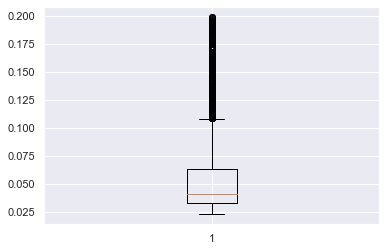

In [78]:
# Bring outliers down/up to 5 standard deviations from the mean
for feat in df.columns:
    try:
        abv_5_std = df[feat].mean()+ 5* df[feat].std()
        below_5_std = df[feat].mean()- 5* df[feat].std()
        conditions = [df[feat]>abv_5_std, df[feat]<below_5_std]
        choices = [abv_5_std, below_5_std]
        df[feat] = np.select(conditions, choices, df[feat])
    except:
        pass

# address speechiness separately, because it has a ton of upper outliers
df['speechiness'][df['speechiness']>.2] = df['speechiness'].mean()+ 1* df['speechiness'].std()
plt.boxplot(df['speechiness']);

### Standardize

In [82]:
# Scale features down to 0-1
df['scaled_speech'] = (df['speechiness'] - min(df['speechiness'])) / (max(df['speechiness']) - min(df['speechiness']))
df['scaled_duration'] = (df['duration_ms'] - min(df['duration_ms'])) / (max(df['duration_ms']) - min(df['duration_ms']))
df['scaled_loudness'] = (df['loudness'] - min(df['loudness'])) / (max(df['loudness']) - min(df['loudness']))
df['scaled_tempo'] = (df['tempo'] - min(df['tempo'])) / (max(df['tempo']) - min(df['tempo']))
df['scaled_pop'] = (df['popularity'] - min(df['popularity'])) / (max(df['popularity']) - min(df['popularity']))
df.sample(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist,label,letter_keys,modes,scaled_speech,scaled_duration,scaled_loudness,scaled_tempo,scaled_pop
735,0.67500,0.904,132971.0,0.534,0.0,3KB1Z1mQulL4SdJTmrbTyO,0.000,5.0,0.231,-9.003,1.0,Get Rhythm,42.0,1969-01-01,0.065000,110.840,0.9490,1969.0,Johnny Cash,Third Man,F,Major,0.239501,0.161064,0.652064,0.416933,0.506024
6258,0.21900,0.504,298173.0,0.718,0.0,6cqXhzuVIH4Hm2CkF7ZN21,0.503,4.0,0.257,-7.202,1.0,Helicopter,50.0,2010-09-27,0.039000,73.984,0.4180,2010.0,Deerhunter,Sub Pop,E,Major,0.091941,0.400547,0.701224,0.222055,0.602410
3265,0.00756,0.183,188840.0,0.971,0.0,50vziqQ4v5QpjQvZbPlr0b,0.245,2.0,0.943,-8.727,1.0,"Goodnight - Live at Nippon Budokan, Tokyo, JPN...",25.0,1978-10-08,0.146614,162.563,0.0767,1978.0,Cheap Trick,Sub Pop,D,Major,0.702688,0.242054,0.659598,0.690420,0.301205


# Exploratory Data Analysis
### Distribution of songs by year

In [83]:
# set release date as datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [84]:
# create year column
df['year'] = df['release_date'].dt.year

In [85]:
# create decade column
df['decade'] = df['year'].apply(lambda x: str(x)[:3]+'0s')

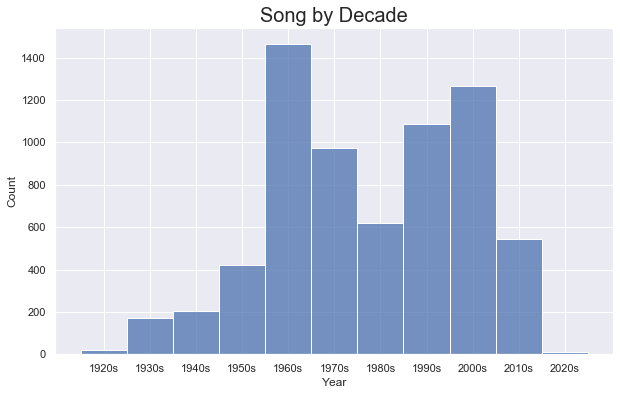

In [86]:
# distribution of songs by decade
sns.set_theme(context='notebook')
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df['decade'].sort_values(), bins='auto')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Song by Decade', fontdict={'fontsize':20});

### Distribution of songs by year, by Record Label

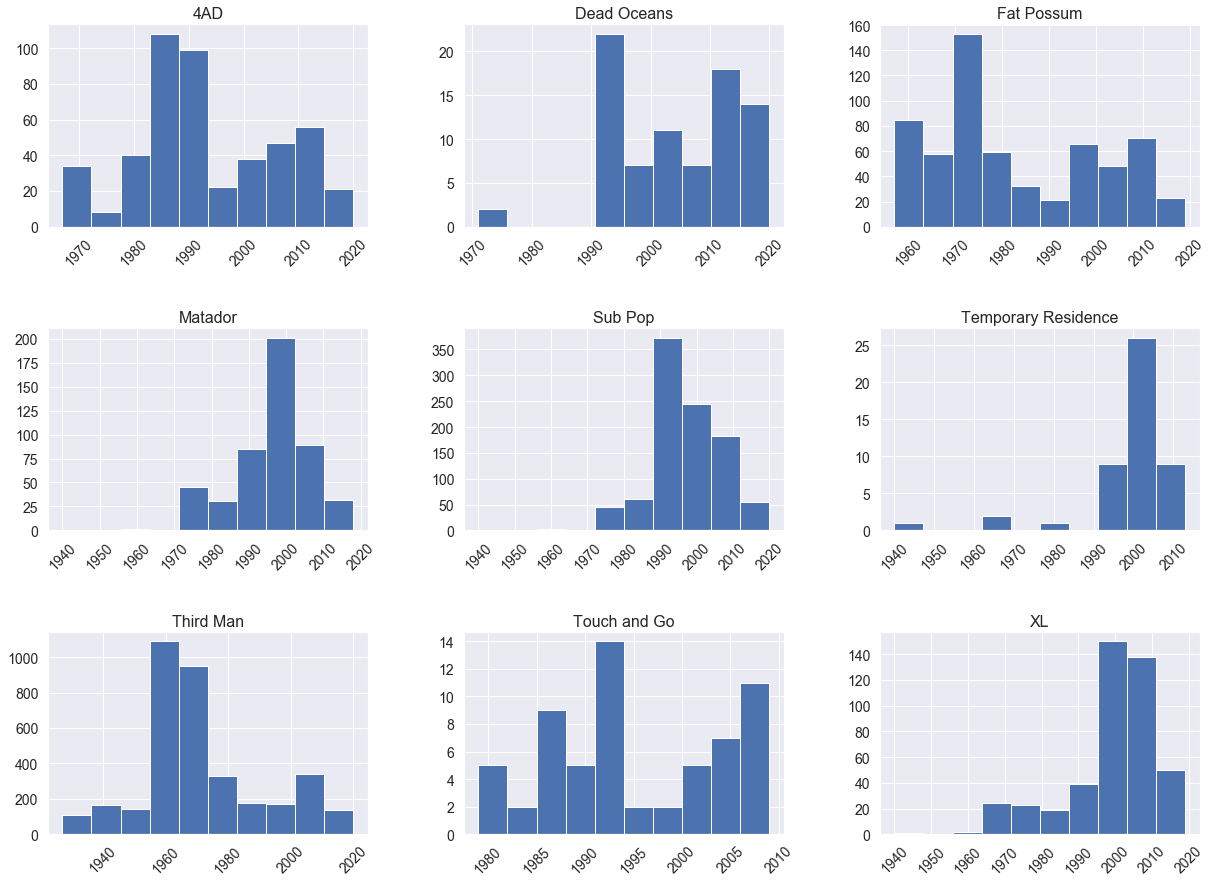

In [87]:
# look at distribution by year for by label
fig = df['year'].hist(by=df['label'],
                xrot=45,
                xlabelsize=14,
                ylabelsize=14,
                figsize=(20,15))
[x.title.set_size(16) for x in fig.ravel()];


## Song Attributes Compared with Popularity

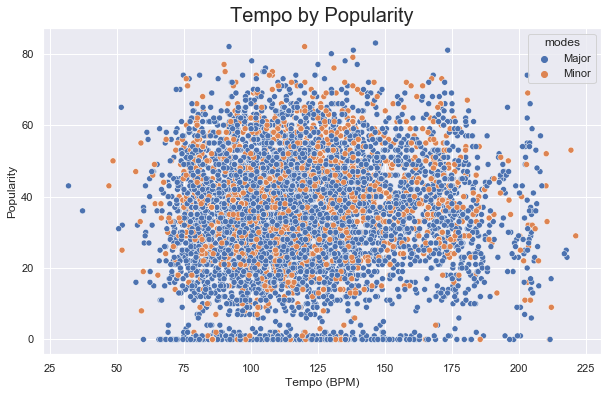

In [88]:
# tempo by popularity
plt.figure(figsize=(10,6))
sns.scatterplot(y='popularity', x='tempo', hue='modes', data=df)
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.title('Tempo by Popularity', fontdict={'fontsize':20});

In [89]:
df['modes'].value_counts()

Major    5168
Minor    1615
Name: modes, dtype: int64

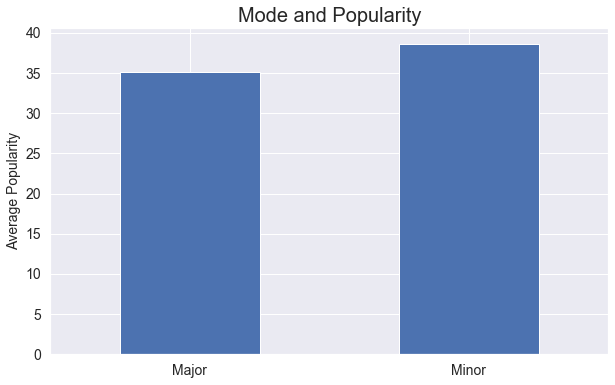

In [93]:
# whats more popular, major or minor key songs
df.groupby('modes')['popularity'].mean().plot(kind='bar',
                                             figsize=(10,6),
                                              fontsize=14,
                                             rot='horizontal')
plt.title("Mode and Popularity", fontdict={'fontsize':20})
plt.ylabel('Average Popularity', fontdict={'fontsize':14})
plt.xlabel('');

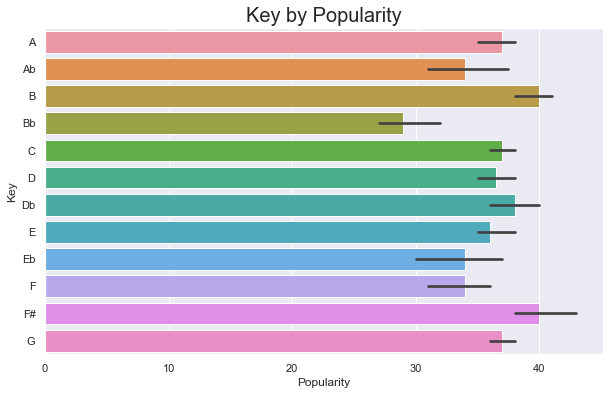

In [94]:
# look at key by popularity
plt.figure(figsize=(10,6))
sns.barplot(y=df['letter_keys'].sort_values(), x=df['popularity'], estimator=np.median, orient='h')
plt.xlabel("Popularity")
plt.ylabel("Key")
plt.title("Key by Popularity", fontdict={'fontsize':20});

In [95]:
# create a column that concatonates key with mode
df['key_mode'] = df['letter_keys'] + " " + df['modes']

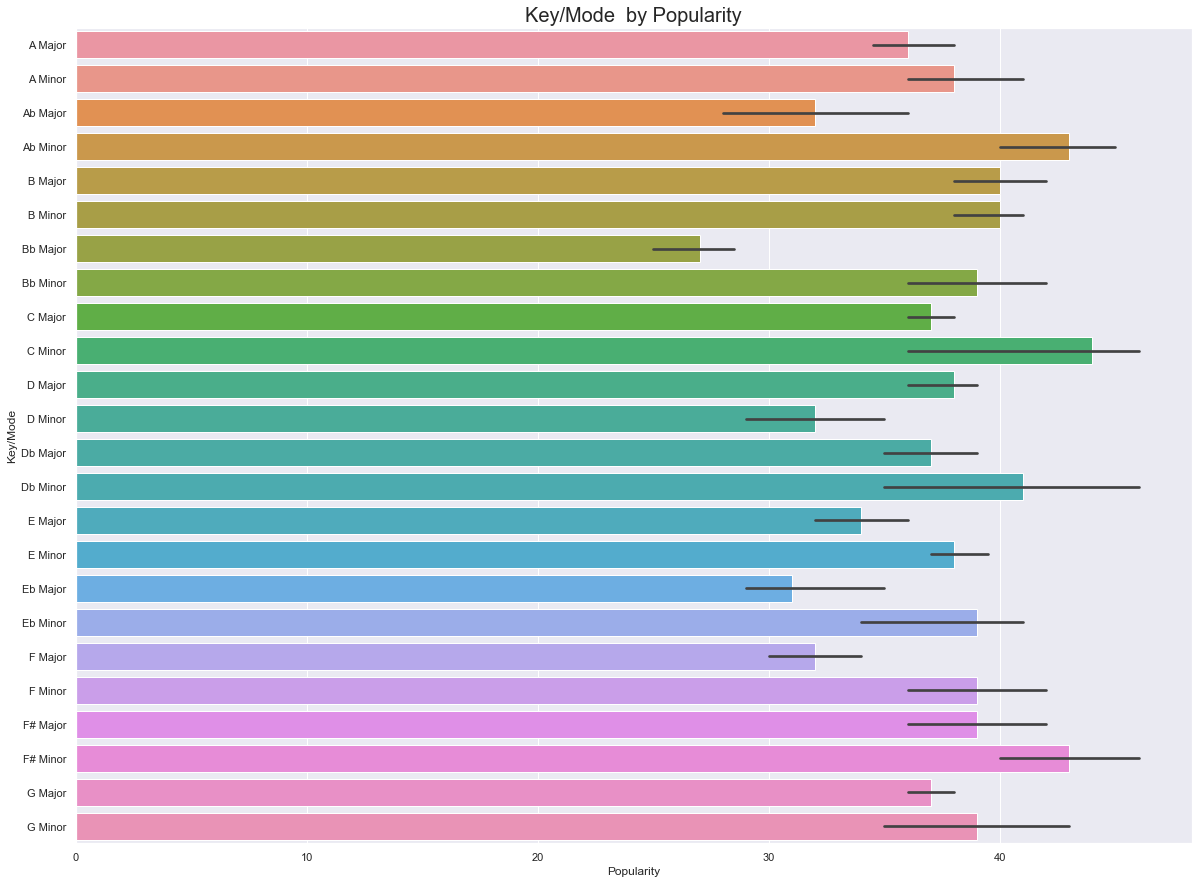

In [96]:
plt.figure(figsize=(20,15))
sns.barplot(y=df['key_mode'].sort_values(), x=df['popularity'], estimator=np.median, orient='h')
plt.xlabel("Popularity")
plt.ylabel("Key/Mode")
plt.title("Key/Mode  by Popularity", fontdict={'fontsize':20});

## Record label summary by attribute

In [99]:
song_char = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']

label_sum_df = df.groupby('label')['acousticness', 'danceability', 'energy', 'instrumentalness',\
                                   'liveness', 'speechiness', 'valence'].mean()

label_sum_df

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
label,,,,,,,
4AD,0.279961,0.472418,0.562399,0.247659,0.177847,0.045006,0.445027
Dead Oceans,0.328258,0.439210,0.513146,0.326451,0.165757,0.046488,0.402330
Fat Possum,0.420300,0.551361,0.505139,0.075654,0.192469,0.057345,0.575210
Matador,0.255059,0.470882,0.671690,0.256433,0.207948,0.055575,0.471008
Sub Pop,0.191383,0.467457,0.686697,0.190806,0.196339,0.053300,0.468853
Temporary Residence,0.471849,0.423383,0.403742,0.531453,0.155975,0.048809,0.319010
Third Man,0.599442,0.542683,0.490107,0.081330,0.225435,0.058181,0.608405
Touch and Go,0.142653,0.504516,0.699587,0.337755,0.201535,0.059631,0.444885
XL,0.325013,0.520409,0.602645,0.196815,0.182411,0.062878,0.477185


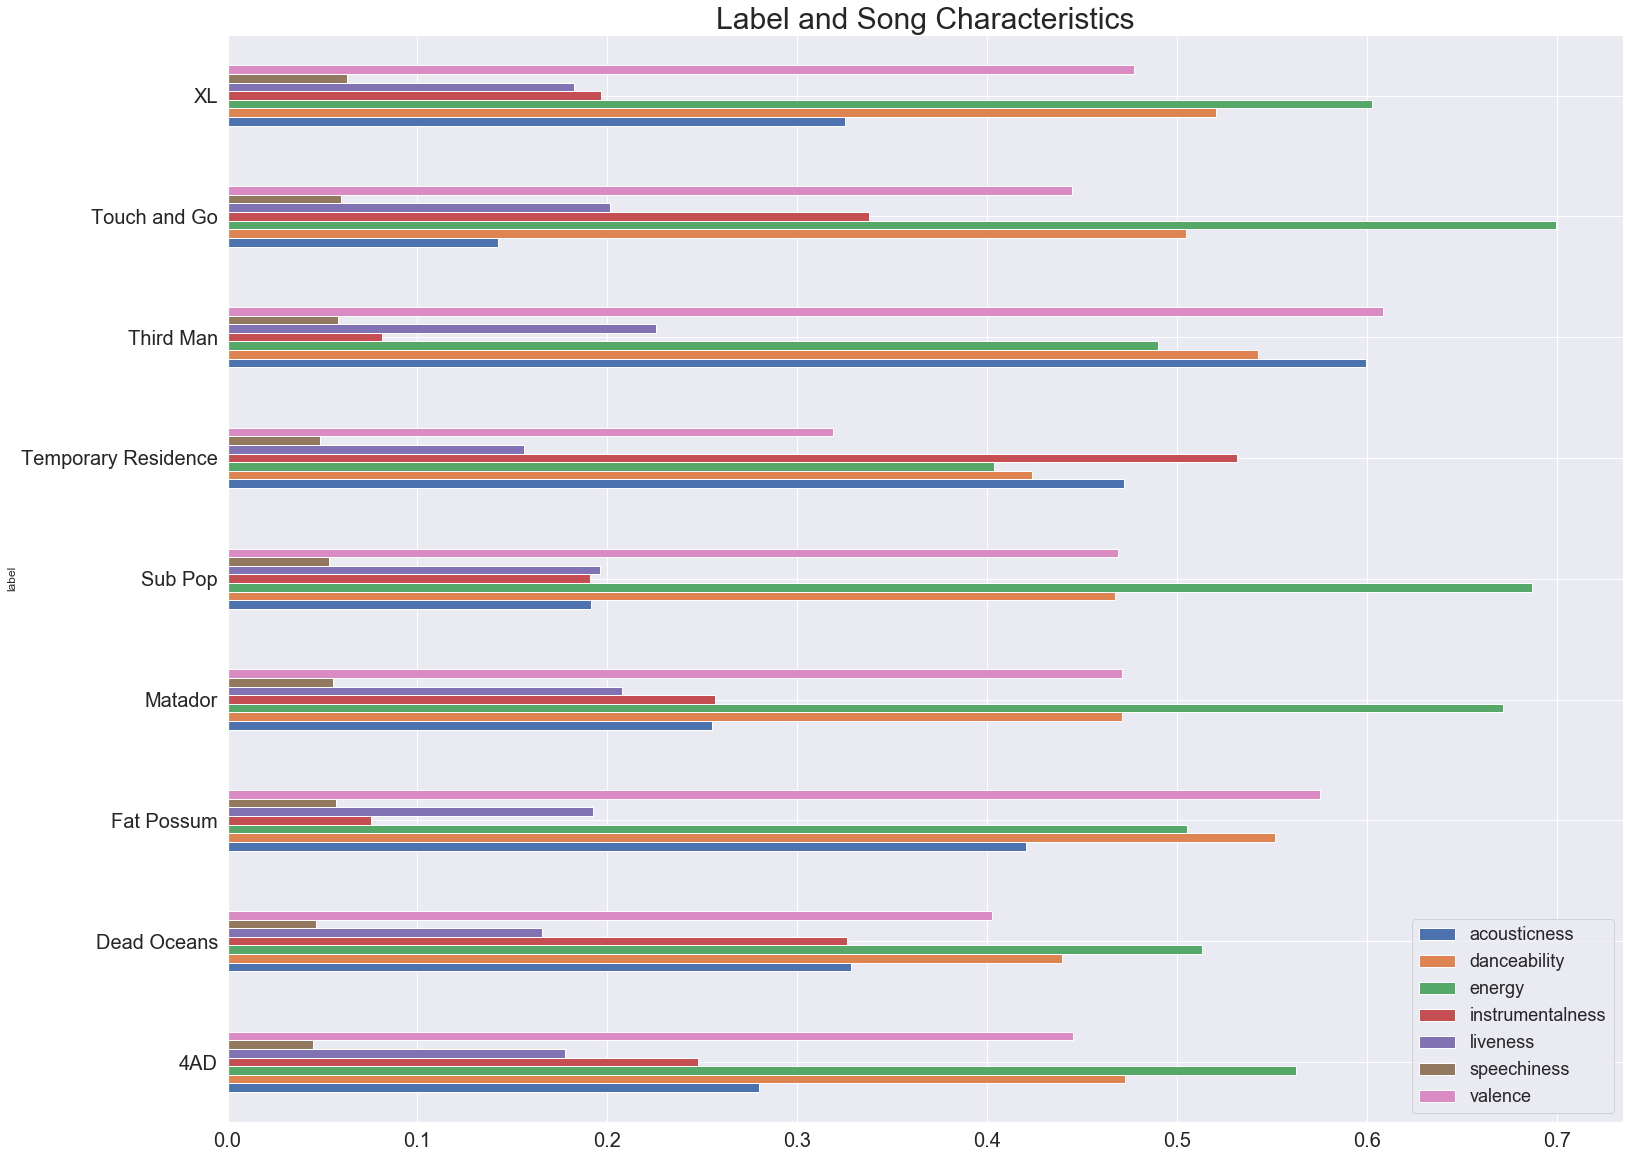

In [100]:
# visualize the above df
fig = label_sum_df.plot(kind='barh', 
                  by='label', 
                  figsize=(25,20),
                 title='Label and Song Characteristics',
                fontsize=20)
fig.title.set_size(30)
fig.legend(fontsize=18, loc='best');

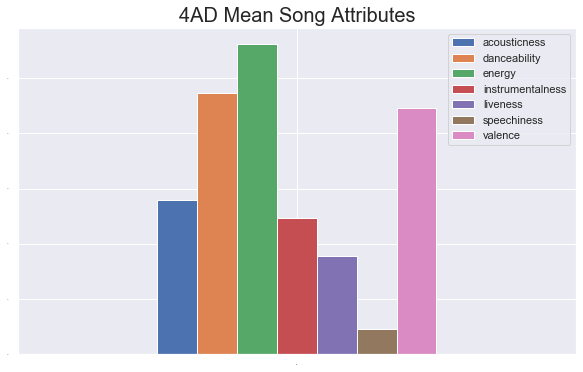

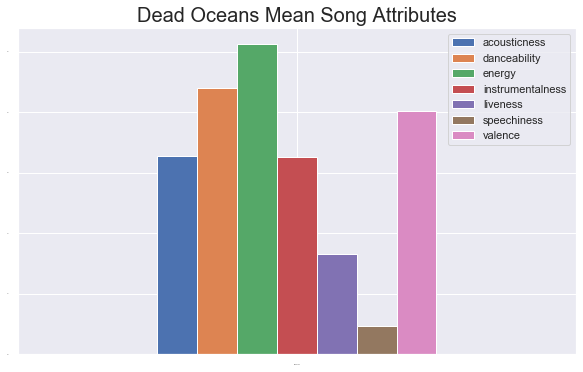

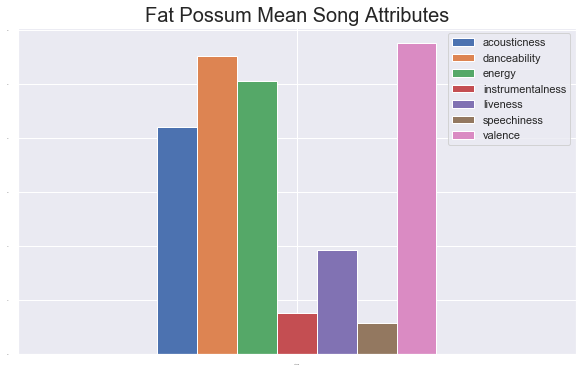

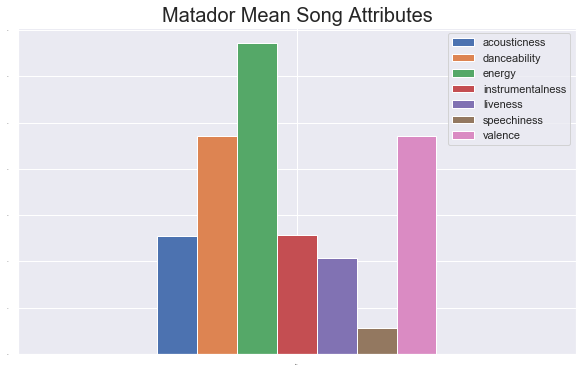

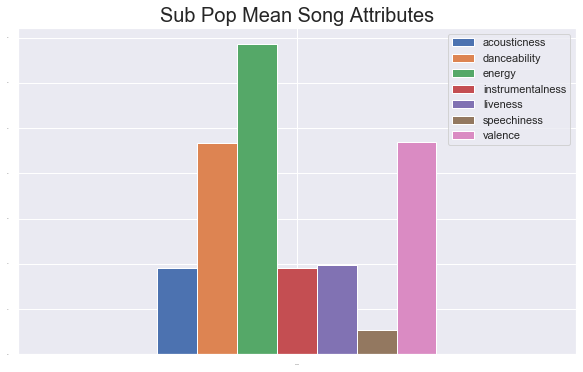

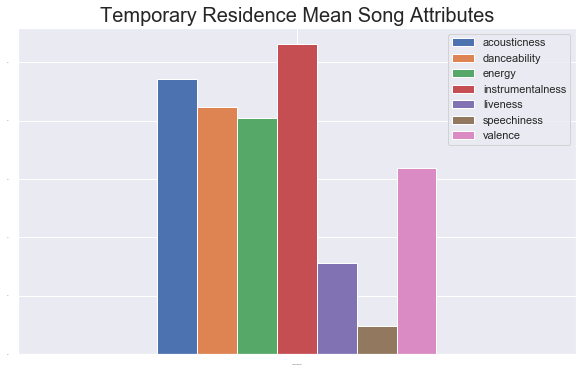

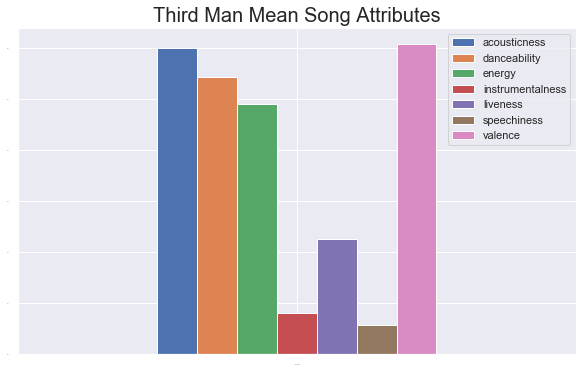

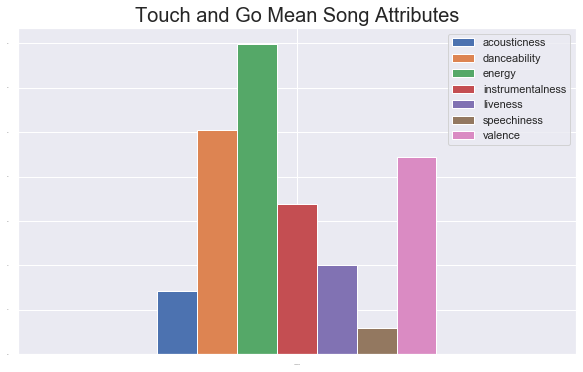

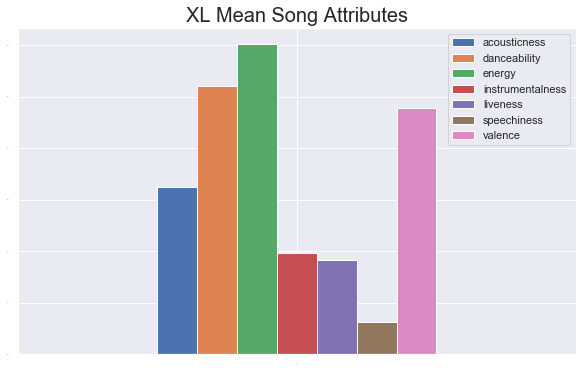

In [101]:
# summary of song charactieristics by label
label_list = label_sum_df.index
for label in label_list:
    label_sum_df.loc[[label]].plot(kind='bar',
                            figsize=(10,6),
                                  fontsize=0,
                                  rot='horizontal')
    plt.xlabel('')
    plt.title(label=label + " Mean Song Attributes", fontdict={'fontsize':20});

In [44]:
## artist count per label
df.groupby('label')['artist'].count()

label
4AD                     473
Dead Oceans              81
Fat Possum              615
Matador                 486
Sub Pop                 964
Temporary Residence      48
Third Man              3608
Touch and Go             62
XL                      446
Name: artist, dtype: int64

### Include Scaled Features

In [102]:
# group averaged song attributes for all continuous features, by records label
continuous_features = ['scaled_loudness', 'scaled_tempo','scaled_pop', 'scaled_duration', 'scaled_speech',
                    'valence',  'liveness', 'instrumentalness', 'energy', 'danceability', 'acousticness']
grouped_by_label = df.groupby('label')[continuous_features].mean()
grouped_by_label.sample(5)

,scaled_loudness,scaled_tempo,scaled_pop,scaled_duration,scaled_speech,valence,liveness,instrumentalness,energy,danceability,acousticness
label,,,,,,,,,,,
Dead Oceans,0.612496,0.447673,0.584709,0.339775,0.134437,0.402330,0.165757,0.326451,0.513146,0.439210,0.328258
Temporary Residence,0.484872,0.427600,0.530120,0.460371,0.147612,0.319010,0.155975,0.531453,0.403742,0.423383,0.471849
Sub Pop,0.665825,0.507156,0.519622,0.311939,0.173099,0.468853,0.196339,0.190806,0.686697,0.467457,0.191383
Fat Possum,0.593210,0.471197,0.421706,0.290134,0.196053,0.575210,0.192469,0.075654,0.505139,0.551361,0.420300
Matador,0.657868,0.490339,0.513337,0.334725,0.186013,0.471008,0.207948,0.256433,0.671690,0.470882,0.255059


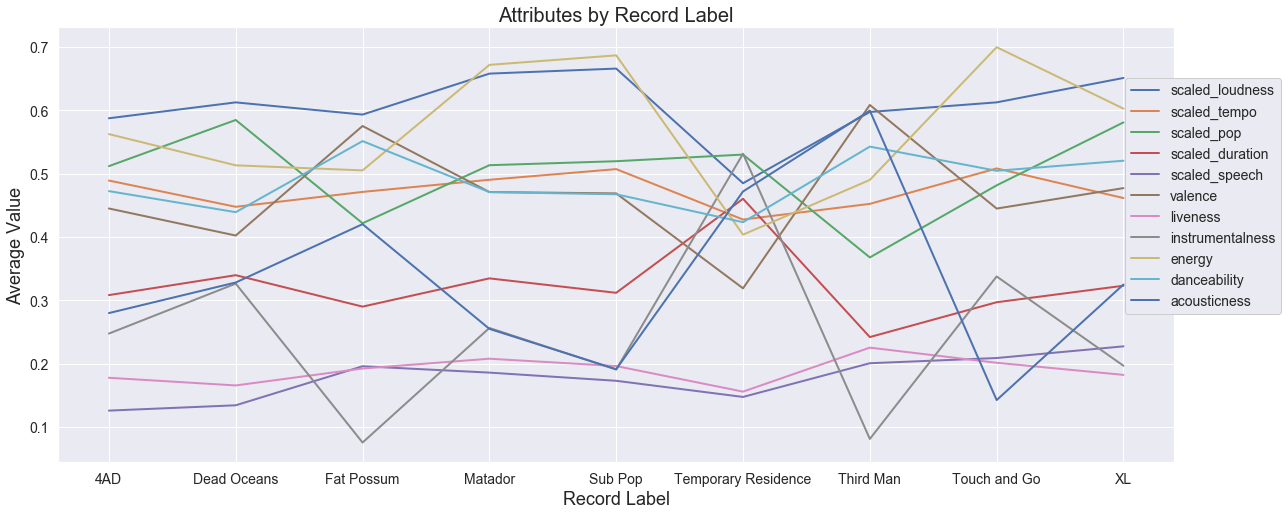

In [103]:
# plot the above dataframe
plt.figure(figsize=(20, 8))
for feat in continuous_features:
    x = grouped_by_label[feat]
    ax= sns.lineplot(x=x.index,y=x,label=feat,linewidth = 2, seed=4)

ax.set_title('Attributes by Record Label', fontsize=20);
ax.set_ylabel('Average Value', fontsize=18);
ax.set_xlabel('Record Label', fontsize=18);
ax.legend(prop=dict(size=14), loc='best', bbox_to_anchor=(.95, .9), framealpha=1.0);
ax.set_xticklabels(fontsize=14, labels=grouped_by_label.index);
ax.set_yticklabels(fontsize=14, labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]);

### Direct comparison of record labels

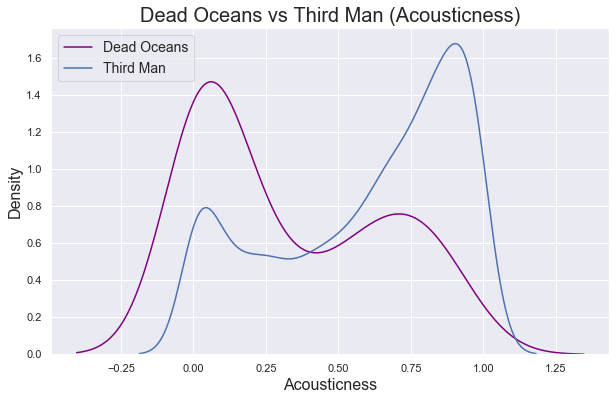

In [110]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['acousticness'][df['label'] == 'Dead Oceans'], label= 'Dead Oceans', color='purple', hist=False);
ax = sns.distplot(df['acousticness'][df['label'] == 'Third Man'], label= 'Third Man', hist=False);
ax.set_title('Dead Oceans vs Third Man (Acousticness)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('Acousticness', fontsize=16);
ax.legend(prop=dict(size=14));

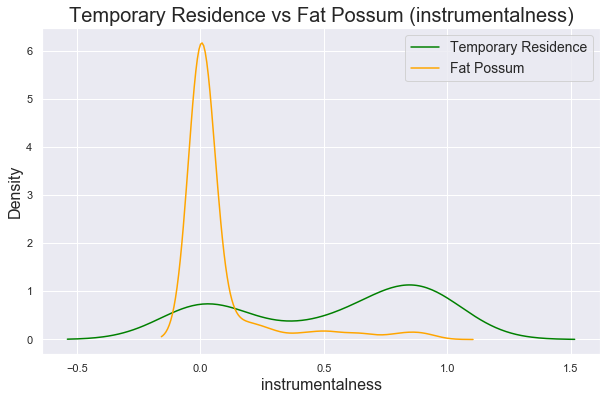

In [112]:
plt.figure(figsize=(10, 6));
ax = sns.distplot(df['instrumentalness'][df['label'] == 'Temporary Residence'], label= 'Temporary Residence', color='green', hist=False);
ax = sns.distplot(df['instrumentalness'][df['label'] == 'Fat Possum'], label= 'Fat Possum',color='orange', hist=False);
ax.set_title('Temporary Residence vs Fat Possum (instrumentalness)', fontsize=20);
ax.set_ylabel('Density', fontsize=16);
ax.set_xlabel('instrumentalness', fontsize=16);
ax.legend(prop=dict(size=14));

### Heatmap of most variant attributes

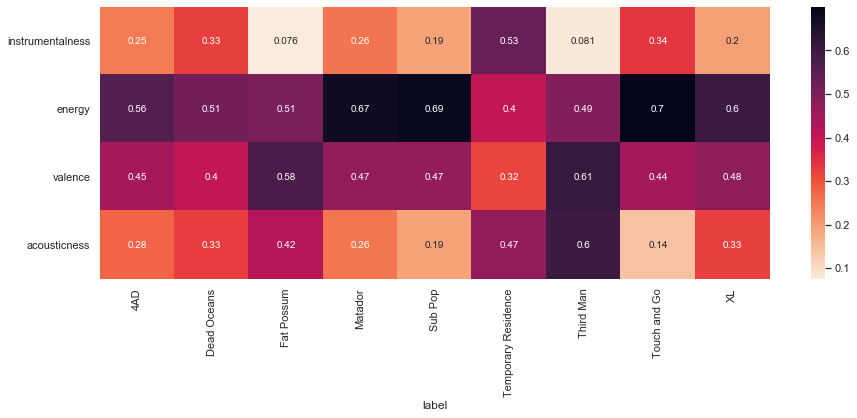

In [104]:
# pivot the table
pivoted = grouped_by_label.pivot_table(columns=grouped_by_label.index)

# make heatmap with most variant features
plt.figure(figsize=(15, 5))
ax.set_ylim(-20, 20)
sns.heatmap(pivoted.loc[['instrumentalness', 'energy', 'valence', 'acousticness']],annot=True, cmap='rocket_r');

# Statistical Tests

In [ ]:
# :-)

### Save cleaned dataframe to CSV

In [106]:
df.to_csv('data/cleaned_data.csv')